## **Unsupervised Learning with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement clustering functions. We will start with simple clustering on iris dataset.

### **K Means Clustering**
Predict the optimum number of clusters and visualize 

## Author: Irshad Yasseen A


---

# Importing Dependencies

In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans

# Load DataSet

In [21]:
df=pd.read_csv("Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Setting input Variable 

In [22]:
pd.set_option("display.max_rows",5)
x=df.iloc[:,1:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Using Elbow curve to obtaing the optimal number of clusters

In [23]:
# Getting wcss info for the clusters
wcss=[]
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    model.fit(x)
    wcss.append(model.inertia_)
    

In [24]:
wcss

[680.8244000000001,
 152.36870647733906,
 78.94084142614601,
 57.31787321428572,
 46.56163015873017,
 38.93096304967175,
 34.19068792479661,
 30.063874432733133,
 27.87928787878788,
 26.04820224804436]

In [25]:
import os
import time
from tqdm import tqdm

# Testing tqdm module's progress tracker 

In [26]:
from tqdm import tqdm
import time

# Define a range for your loop
for i in tqdm(range(10) ,bar_format="{l_bar}{bar}| {percentage:3.0f}%|" 
              ,desc="Processing items"
              ,ncols=100
              ,miniters=0.1):
    # Simulate some work being done
    time.sleep(1)

Processing items: 100%|██████████████████████████████████████████████████████████████████████| 100%|


# Measuring the impact of threads on Kmeans computation

In [27]:
desc = "Processing items"
ncols = 100
miniters = 0.1

wcss = []
results = pd.DataFrame(columns=["No OF THREADS", "NO OF CLUSTERS", "WCSS", "Time Taken"])

print("J\t WCSS")
for j in tqdm(range(1, 16), desc=desc, ncols=ncols, miniters=miniters):
    os.environ['OMP_NUM_THREADS'] = str(j)
    for i in range(1, 11):
        start_time = time.time()
        model = KMeans(n_clusters=i, init='k-means++',
                       max_iter=300, n_init=100, random_state=0)
        model.fit(x)
        end_time = time.time()
        elapsed_time = end_time - start_time
        wcss.append((model.inertia_))
        results = results.append({'No OF THREADS': j, "NO OF CLUSTERS": i, "WCSS": model.inertia_, "Time Taken": elapsed_time},
                                 ignore_index=True)

print(results)


J	 WCSS


Processing items:   0%|                                                      | 0/15 [00:00<?, ?it/s]C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_52292\1021328571.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'No OF THREADS': j, "NO OF CLUSTERS": i, "WCSS": model.inertia_, "Time Taken": elapsed_time},
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_52292\1021328571.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'No OF THREADS': j, "NO OF CLUSTERS": i, "WCSS": model.inertia_, "Time Taken": elapsed_time},
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_52292\1021328571.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.

     No OF THREADS  NO OF CLUSTERS        WCSS  Time Taken
0              1.0             1.0  680.824400    2.617524
1              1.0             2.0  152.368706    2.699961
..             ...             ...         ...         ...
148           15.0             9.0   27.840874    2.724134
149           15.0            10.0   25.978706    3.066860

[150 rows x 4 columns]


In [28]:
pd.set_option("display.max_rows",9999)
results

,No OF THREADS,NO OF CLUSTERS,WCSS,Time Taken
0,1.0,1.0,680.824400,2.617524
1,1.0,2.0,152.368706,2.699961
2,1.0,3.0,78.940841,2.643205
3,1.0,4.0,57.317873,2.700760
4,1.0,5.0,46.535582,2.746819
5,1.0,6.0,38.930963,2.753386
6,1.0,7.0,34.189205,2.818215
7,1.0,8.0,29.881402,2.846815
8,1.0,9.0,27.840874,2.784952
9,1.0,10.0,25.978706,2.772255


plt.plot(results['No OF THREADS'],[results"Time Taken"])

<Figure size 1000x11500 with 0 Axes>

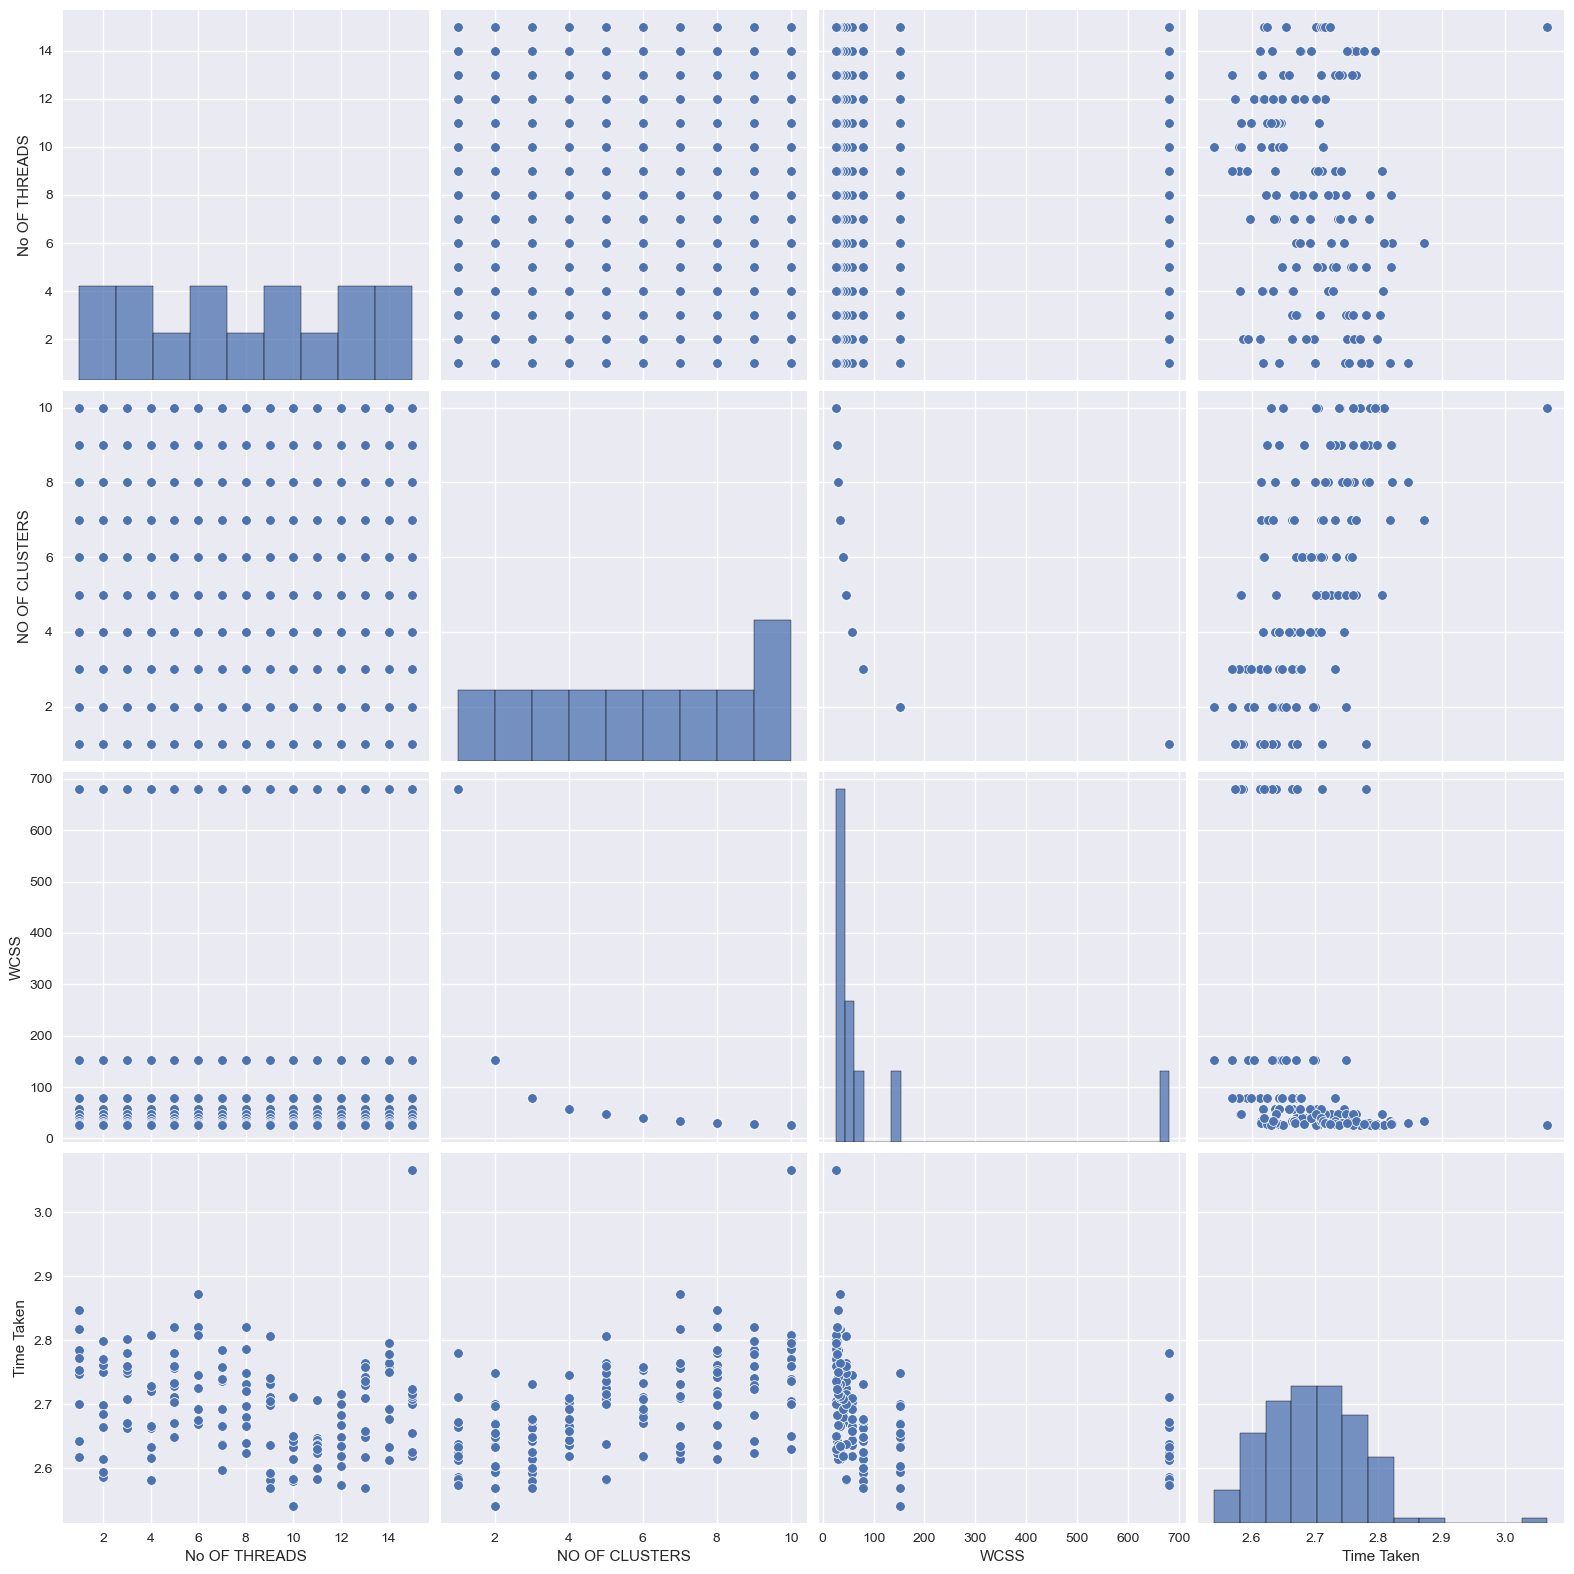

In [29]:
import seaborn as sns
fig=plt.figure(figsize=(10,115))
sns.pairplot(results,height=4)

# Elbow Graph 
Wcss vs Number of clusters visualization

C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_52292\3839648122.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, 'Wcss')

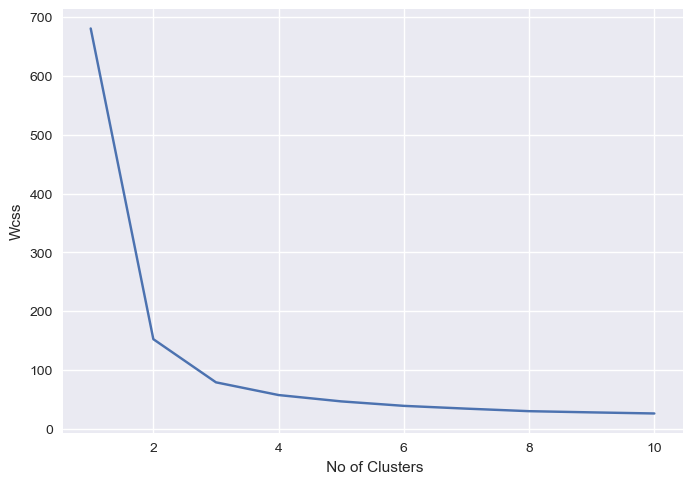

In [30]:
plt.style.use("seaborn")
plt.plot(range(1,11),wcss[:10])
plt.xlabel(" No of Clusters")
plt.ylabel('Wcss')

# K means model

In [31]:
model = KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=100, random_state=0)
pred_labels=model.fit_predict(x)

In [32]:
pred_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualizing result

# Based on sepal 

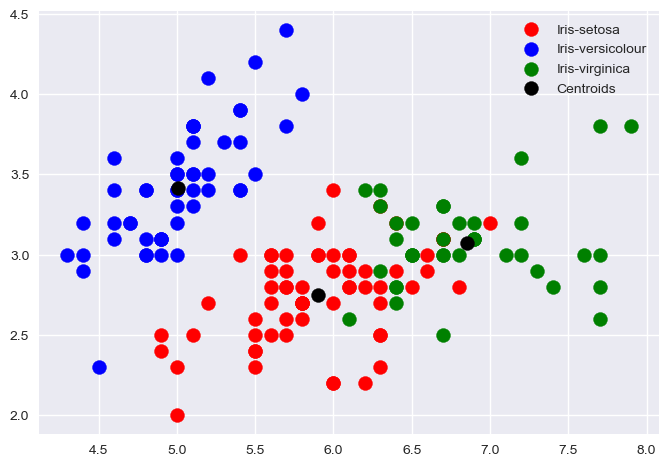

In [46]:
plt.scatter(x[pred_labels == 0, 0], x[pred_labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_labels == 1, 0], x[pred_labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred_labels == 2, 0], x[pred_labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()